# Final Notebook

This notebook shows the final functionality of the libraries created for this project. The files created are:
* `datasets.py` which contains the loader for different datasets
* `schedulers.py` which contains the Scheduler class for our Population Based algorithm
* `oracle.py` which contains the implementation for the Bayesian Optimization
* `model.py` which contains the network models which are being trained

In the following also `torch`, `hyperopt` will be used

In [14]:
import model, datasets, schedulers, oracles
import time
import torch
from hyperopt import hp, fmin, tpe, Trials, rand
import matplotlib.pyplot as plt
import os
path = ""

To train the data we use the following routine:

In [2]:
for i in range(5):
    n_configurations = 72
    total_iterations = 5
    model_config = {
        "lr": 0.031
    }
    config = {
        "lr": hp.uniform("lr",0,.1),
        "droupout_prob": hp.uniform("droupout_prob",0,1),
        "weight_decay": hp.uniform("weight_decay",0,.1),
        "b1" : hp.uniform("b1",0.9, 1),
        "b2" : hp.uniform("b2",0.99, 1),
        "eps" : hp.uniform("eps",6, 20)

    }


    def translation(liste):
        config = {}
        config["lr"] = liste[0]
        config["droupout_prob"] = liste[1]
        config["weight_decay"] = liste[2]
        config["b1"] = liste[3]
        config["b2"] = liste[4]
        config["eps"] = liste[5]
        return config

    config=   [(0,.1),(0.,1.),(0,.1),(.9,1-1e-10),(.99,1-1e-10),(6.,20.)]


    model = datasets.TrainBoston #(model_config, "LeNet")
    oracle = oracles.Guesser(config,0)
    start_time = time.time()
    scheduler = schedulers.Scheduler(model, total_iterations, n_configurations, oracle,2,True,1e100)
    scheduler.initialisation()
    scheduler.loop()

/home/antoine/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/antoine/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


iter1
parent_idx0.02172410955616072
iter2
parent_idx0.02172410721872367
iter3
parent_idx0.02171033971449908
iter4
parent_idx0.02171033737706203
iter1
parent_idx0.0218126516716153
iter2
parent_idx0.01957001054988188
iter3
parent_idx0.019187214327793495
iter4
parent_idx0.019018894317103366
iter1
parent_idx0.025475427216174556
iter2
parent_idx0.024013566035850375
iter3
parent_idx0.019124193518769508
iter4
parent_idx0.018915006927415438


/home/antoine/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


iter1
parent_idx0.02192523900200339
iter2
parent_idx0.019792949452119714
iter3
parent_idx0.019327573916491342
iter4
parent_idx0.019163053409726013
iter1
parent_idx0.02008019007888495
iter2
parent_idx0.020108653049842985
iter3
parent_idx0.01835499791538014
iter4
parent_idx0.019596395539302452


In [2]:
def translation(liste):
    config = {}
    config["lr"] = liste[0]
    config["droupout_prob"] = liste[1]
    config["weight_decay"] = liste[2]
    config["b1"] = liste[3]
    config["b2"] = liste[4]
    config["eps"] = liste[5]
    return config


translation([1,3,4,5,3,5])


{'lr': 1, 'droupout_prob': 3, 'weight_decay': 4, 'b1': 5, 'b2': 3, 'eps': 5}

In [ ]:
model = datasets.TrainBoston #(model_config, "LeNet")


In [4]:
def f(x):
    return np.sum(x)

In [23]:
import skopt
import numpy as np



coucou = skopt.gp_minimize(f,config,n_calls=10)

In [26]:
x0 =coucou.x_iters
y0= coucou.func_vals
len(x0)

10

In [27]:
coucou2 = skopt.gp_minimize(f,config,n_calls=10,x0=x0,y0=y0)

In [28]:
x0 =coucou2.x_iters
y0= coucou2.func_vals
len(x0)

20

In [29]:
coucou4 = skopt.gp_minimize(f,config,n_calls=10,x0=x0,y0=y0)

In [30]:
coucou4

          fun: 8.002008699630668
    func_vals: array([11.02092573, 18.99495235, 10.04888737, 19.93596079, 14.06833562,
       20.03335785, 17.10957945, 12.08772151, 17.05506647, 16.07171061,
        8.0020087 , 17.0377499 , 14.00254724, 16.07650565, 17.08891509,
       10.08472907, 12.97243565, 13.03437775,  9.0201163 , 17.07197449,
       19.061424  ,  8.02273599,  8.03963449, 10.05921454, 16.04766548,
       11.97345885, 17.03741938, 17.99004856, 22.03107064, 14.02167873])
       models: [GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=[1, 1, 1, 1, 1, 1], nu=2.5) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=2, noise='gaussian',
                         normalize_y=True, random_state=1839174991)]
 random_state: RandomState(MT19937) at 0x7EFCC40526B0
        space: Space([Real(low=0, high=0.1, prior='uniform', transform='normalize'),
       Integer(low=0, high=1, prior='uniform', transform='normalize'),
       Real(low=0, high=0.1, prior='unif

In [31]:
skopt.gp_minimize(f,config,n_calls=30)

/home/antoine/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/antoine/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/antoine/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/antoine/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/antoine/anaconda3/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The o

          fun: 7.890000000000001
    func_vals: array([13.08975941, 10.14487364, 17.02767374, 15.03288283, 18.99237371,
       23.06530958, 16.06131048, 16.16080982, 15.07526595, 20.07497263,
        7.99585338,  7.89      ,  7.9       ,  7.89      ,  7.99      ,
        7.89      ,  7.99      ,  7.94104497,  7.89      ,  7.89      ,
        7.94684803,  7.89      ,  7.89      ,  7.96826208,  7.9942326 ,
        7.98574254,  7.93051144,  7.89      ,  7.90939949,  7.89      ])
       models: [GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=[1, 1, 1, 1, 1, 1], nu=2.5) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=2, noise='gaussian',
                         normalize_y=True, random_state=1265827968), GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=[1, 1, 1, 1, 1, 1], nu=2.5) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=2, noise='gaussian',
                         normalize_y=True, random_state=1265827968

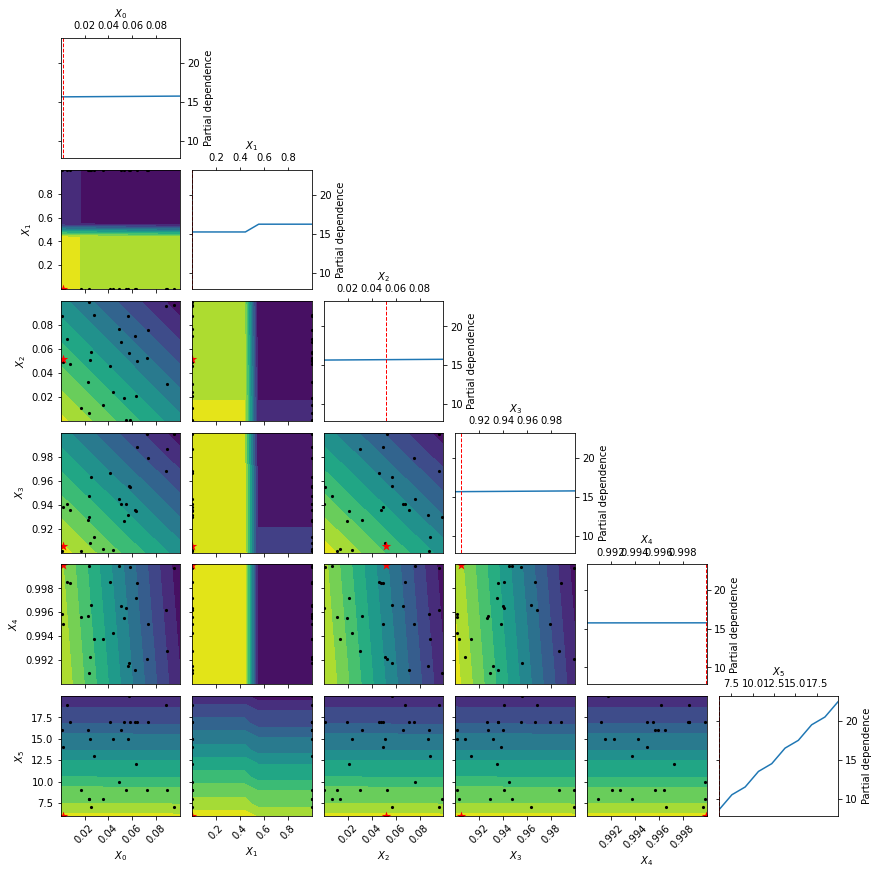

In [33]:
coucou3
from skopt.plots import plot_objective
_ = plot_objective(coucou3, n_points=10)

In [29]:
for _ in range(1):
    oracle = BayesOpt(config)
    start_time = time.time()
    oracle.compute_Once(function)
    print("Total Time : " +  str(time.time() - start_time))

for _ in range(9):

    model = datasets.TrainBoston #(model_config, "LeNet")
    oracle = oracles.Guesser(config,0)
    start_time = time.time()
    scheduler = schedulers.Scheduler(model, total_iterations, n_configurations, oracle,1/2,True,1e100)
    scheduler.initialisation()
    scheduler.loop()
    print("Total Time : " +  str(time.time() - start_time))
 

100%|██████████| 2200/2200 [02:18<00:00, 15.92trial/s, best loss: 0.02389664275973451] 
Total Time : 138.1840374469757


NameError: name 'total_iterations' is not defined

In [28]:
import numpy as np
from functools import *

evals = 2200
crypt = np.zeros(evals)
def function(x):
   # print(x)
    model = datasets.TrainBoston(x)
 #   a,b,c = schedulers.create_Boston()
    for _ in range(5):
        model.train1()
        loss = model.test1()
        test = model.val1()
        temp = dict(x)
        temp.update({'loss' : loss})
        temp.update({'test' : test})
        temp.update({'iteration' :  model.i})

        hyperlogger.on_result(temp)
    return -loss

class BayesOpt():
    def __init__(self, searchspace ):
        self.searchspace = searchspace

    def compute_Once(self,function): 
        fmin(function, self.searchspace, algo=partial(rand.suggest), max_evals=evals, trials=Trials())
    
config= {
     "lr": hp.uniform("lr",0,.1),
     "droupout_prob": hp.uniform("droupout_prob",0,1),
     "weight_decay": hp.uniform("weight_decay",0,.1),
    "b1" : hp.uniform("b1",0.9, 1),
    "b2" : hp.uniform("b2",0.99, 1),
    "eps" : hp.uniform("eps",6,20)
    
}
oracle = BayesOpt(config)

In [25]:
from ray import tune
from ray.tune.logger import *
class HyperLogger(tune.logger.Logger):
    def _init(self):
        progress_file = os.path.join("", "random_Boston.csv")
        self._continuing = os.path.exists(progress_file)
        self._file = open(progress_file, "a")
        self._csv_out = None
    def on_result(self, result):
        tmp = result.copy()
        result = flatten_dict(tmp, delimiter="/")
        if self._csv_out is None:
            self._csv_out = csv.DictWriter(self._file, result.keys())
            self._csv_out.writeheader()

            #if not self._continuing:
        self._csv_out.writerow(
            {k: v
             for k, v in result.items() if k in self._csv_out.fieldnames})
        self._file.flush()
                   
hyperlogger = HyperLogger(config,"")

  


In [21]:
import ray.tune as tune
tune.logger

<module 'ray.tune.logger' from '/home/antoine/anaconda3/lib/python3.7/site-packages/ray/tune/logger.py'>

2021-04-08 10:05:38,181	WARNING worker.py:1107 -- The node with node id 3b3646c2f2db4beffb8f650b6f949066debc8ad0865e45ccaffbadf7 has been marked dead because the detector has missed too many heartbeats from it. This can happen when a raylet crashes unexpectedly or has lagging heartbeats.
(raylet) [2021-04-08 10:06:29,898 C 26370 26370] node_manager.cc:423: This node has beem marked as dead.
(raylet) [2021-04-08 10:06:29,898 E 26370 26370] logging.cc:415: *** Aborted at 1617869189 (unix time) try "date -d @1617869189" if you are using GNU date ***
(raylet) [2021-04-08 10:06:29,899 E 26370 26370] logging.cc:415: PC: @                0x0 (unknown)
(raylet) [2021-04-08 10:06:29,901 E 26370 26370] logging.cc:415: *** SIGABRT (@0x3e800006702) received by PID 26370 (TID 0x7fcb07b70800) from PID 26370; stack trace: ***
(raylet) [2021-04-08 10:06:29,902 E 26370 26370] logging.cc:415:     @     0x55b81a6de9ef google::(anonymous namespace)::FailureSignalHandler()
(raylet) [2021-04-08 10:06:29,903

In [14]:

import argparse

import ray

#from ray import tune
from ray.tune.schedulers.pb2 import PB2
from ray.tune.schedulers import PopulationBasedTraining

from ray.tune.examples.pbt_function import pbt_function

for i in range(10):
    class TestLogger(tune.logger.Logger):
        def _init(self):
            progress_file = os.path.join(path, "Boston_PB2_"+str(i)+".csv")
            self._continuing = os.path.exists(progress_file)
            self._file = open(progress_file, "a")
            self._csv_out = None
        def on_result(self, result):
            tmp = result.copy()
            result = flatten_dict(tmp, delimiter="/")
            if self._csv_out is None:
                self._csv_out = csv.DictWriter(self._file, result.keys())
                self._csv_out.writeheader()
            self._csv_out.writerow(
                {k: v
                 for k, v in result.items() if k in self._csv_out.fieldnames})
            self._file.flush()

    parser = argparse.ArgumentParser()
    parser.add_argument(
        "--smoke-test", action="store_true", help="Finish quickly for testing")
    args, _ = parser.parse_known_args()
    ray.shutdown()
    ray.init()  # force pausing to happen for test

    epsilon = 1e-10
    from ray.tune.suggest.hyperopt import HyperOptSearch
    from ray.tune.suggest import ConcurrencyLimiter
    from ray.tune.suggest.hebo import *
    from ray.tune.suggest.hebo import HEBOSearch
    
    algo = HEBOSearch(metric="loss",
        mode="min")
 #   algo = ConcurrencyLimiter(algo, max_concurrent=8)

    pbt = PB2(
        perturbation_interval=1,
            time_attr="training_iteration",

        hyperparam_bounds={
            # .
     "lr": [0+epsilon, .1] #tune.uniform(1e-4, 0.1 ),#,1e-4), #*10
,     "weight_decay":[0+epsilon, .1]#tune.uniform(1, 5)#,1e-4), #*10 et 0
,     "b1": [.9, 1-epsilon]#,1e-4), #*10 et 0
 ,    "b2": [.99, 1-epsilon] #,1e-4), #*10 et 0
 ,    "droupout_prob": [0+epsilon, 1-epsilon]#,1e-4), #*10 et 0
            ,"eps": [6,20]
        })

    analysis = tune.run(
        train_boston_pb2,
  checkpoint_at_end=True,
        scheduler=pbt,
        metric="loss",
        mode="min",
        search_alg = algo,
        verbose=1,
        stop={
            "training_iteration": 5,
        },
        num_samples=72,
  reuse_actors=True,
loggers=[TestLogger],
        
          config= {
  "lr":  tune.uniform(0+epsilon, .1) #tune.uniform(1e-4, 0.1 ),#,1e-4), #*10
  ,     "weight_decay":tune.uniform(0+epsilon, .1)#tune.uniform(1, 5)#,1e-4), #*10 et 0
  ,     "b1": tune.uniform(.9, 1-epsilon)#,1e-4), #*10 et 0
  ,    "b2": tune.uniform(.99, 1-epsilon)#,1e-4), #*10 et 0
  ,    "droupout_prob": tune.uniform(0+epsilon, 1-epsilon)#,1e-4), #*10 et 0
    ,"eps": tune.uniform(6, 20)
                      })

    print("Best hyperparameters found were: ", analysis.best_config)

ModuleNotFoundError: No module named 'tune.schedulers'

In [6]:
from ray.tune.logger import *

from sklearn import datasets as skl_datasets

import torch.nn as nn
import copy
from torchvision import datasets as tv_datasets
from torchvision import transforms as tv_transforms
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F

import pandas as pd
from sklearn import datasets as skl_datasets

from sklearn.model_selection import train_test_split
# custom imports from the same folder
import models
import torch.nn.functional as F
class train_boston_pb2(tune.Trainable):
    def setup(self, config):
        self.config = { }
        for key, value in config.items():
            self.config[key] = value
        config = self.config
        
        valid_ratio = 0.5
        test_ratio = 0.2
        data = skl_datasets.load_boston()

        # importing the data into pandas dataframe
        X = pd.DataFrame(data.data, columns=data.feature_names)
        Y = pd.DataFrame(data.target, columns=["MEDV"])

        # normalizatoion of features
        Y = Y.apply(lambda x: (x - x.mean()) / x.std())

        #
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_ratio, random_state=1234)
        X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=valid_ratio, random_state=1234)

        split_data = [X_train, y_train, X_test, y_test, X_val, y_val]
        x_train, y_train, x_test, y_test, x_val, y_val = [torch.tensor(x.values, dtype=torch.float) for x in split_data]
        for x in split_data:
            print(x.shape) 
        self.train_loader = torch.utils.data.DataLoader(
            torch.utils.data.TensorDataset(x_train, y_train),
            batch_size=100,
            shuffle=True
        )

        self.test_loader = torch.utils.data.DataLoader(
            torch.utils.data.TensorDataset(x_test, y_test),
            batch_size=100,
            shuffle=True
        )

        self.val_loader = torch.utils.data.DataLoader(
            torch.utils.data.TensorDataset(x_val, y_val),
            batch_size=100,
            shuffle=True
        )
        self.i = 0
        if True:
            # many of the parameters are not even used in init
            self.model = models.NeurNet(13,int(round(config.get("hidden_dim",43))),1,
                    int( round(config.get("n_layer",1))),
                    config.get("droupout_prob",0.1) ,nn.functional.relu)
        elif True:
            raise NotImplementedError
        elif True:
            raise NotImplementedError
        else:
            raise ValueError("Model with name {} is not recognized.".format(model_name))
        
        if config.get("b1", 0.999)>=1:
          temp = 1 - 1e-10
        else:
          temp = config.get("b1", 0.999)
                
        if config.get("b2", 0.999)>=1:
          temp1 = 1 - 1e-10
        else:
          temp1 = config.get("b2", 0.999)

        # Method of Optimization
        self.optimizer = torch.optim.Adam(
            self.model.parameters(),
            lr=config.get("lr"), 
            betas=((config.get("b1"), config.get("b2"))),
            eps=10 ** - (config.get("eps")), 
            weight_decay=config.get("weight_decay"), 
            amsgrad=True
        )
       
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model.to(device)

    
    def reset_config(self, config):
        if "lr" in config:
            for param_group in self.optimizer.param_groups:
                param_group["lr"] = config.get("lr", 0.01)
        if "b1" in config:
            for param_group in self.optimizer.param_groups:
                param_group["betas"] = (
                    (1-1e-10 if config.get("b1", 0.999)>=1 else config.get("b1", 0.999),(1-1e-10 if config.get("b2", 0.999)>=1 else config.get("b2", 0.999))))
        if "weight_decay" in config:
            for param_group in self.optimizer.param_groups:
                param_group["weight_decay"] = config.get("weight_decay")
        if "eps" in config:
            for param_group in self.optimizer.param_groups:
                param_group["eps"] = 10**- config.get("eps")
        self.model.adapt(config.get("droupout_prob", 0.5))

        self.config = config
        return True
    
# All NN models should have a function train1 and test1 that calls the common train and test defined above.
# train1 and test1 is then used in the scheduler
    def train1(self):
      #  print("iteration: " + str(self.i) )
        self.i+=1
        datasets.train(self.model, self.optimizer, torch.nn.MSELoss(), self.train_loader)


    def val1(self):
        return datasets.test(self.model,  self.val_loader,2)
        
    def test1(self):
        return datasets.test(self.model, self.test_loader,2)

    def step(self):
        self.train1()
        return {'loss' : self.val1(), 'test' : self.test1()}
    
    def save_checkpoint(self, checkpoint_dir):
        path = os.path.join(checkpoint_dir, "checkpoint")
        torch.save({
            "model": self.model.state_dict(),
            "optim": self.optimizer.state_dict(),

        }, path)

        return checkpoint_dir

    def load_checkpoint(self, checkpoint_dir):
        path = os.path.join(checkpoint_dir, "checkpoint")
        checkpoint = torch.load(path)
        self.model.load_state_dict(checkpoint["model"])
        self.optimizer.load_state_dict(checkpoint["optim"])
epsilon = 1e-10
